# **LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd',context='notebook',grid=False,ticks=True)

# Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

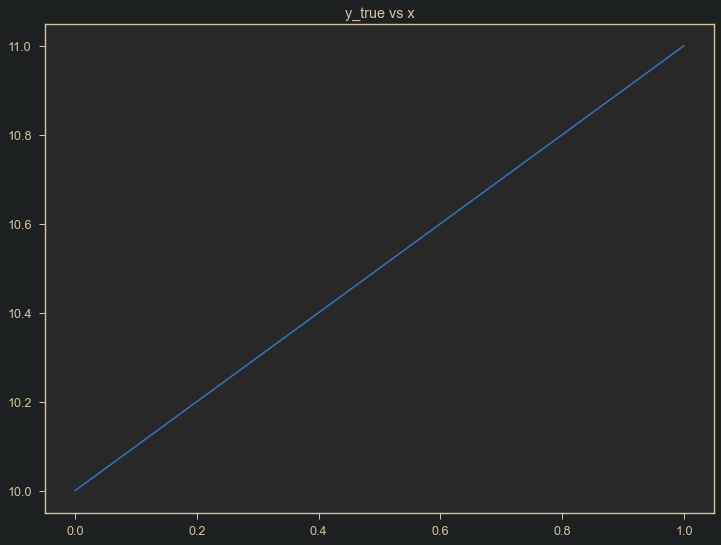

In [2]:
## Write your code here
# x array
x = np.reshape(np.linspace(0,1,1000),(1000,-1))
# print(x.shape)

# initialising some variables
w0 = 10
w1 = 1
# calculating true y
y = w0 + w1*x
# print(y.shape)

# plotting y vs x
plt.figure(figsize=(12,9))
plt.plot(x,y);
plt.title("y_true vs x");

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

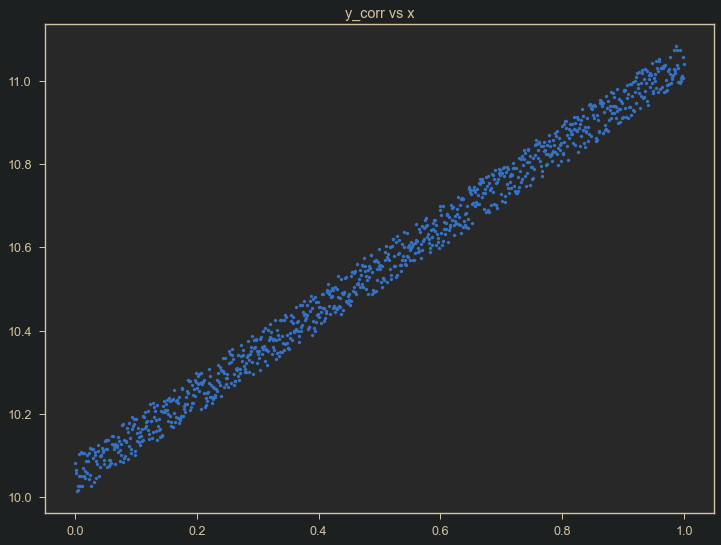

In [3]:
## Write your code here
# generating random noise
rand = np.reshape(np.random.uniform(0,1,len(y)),(1000,-1))
y_cor = y+0.1*rand # adding noise to true y
# print(y_cor.shape)

# plotting corrupted y
plt.figure(figsize=(12,9))
plt.scatter(x,y_cor,s=10);
plt.title("y_corr vs x");

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

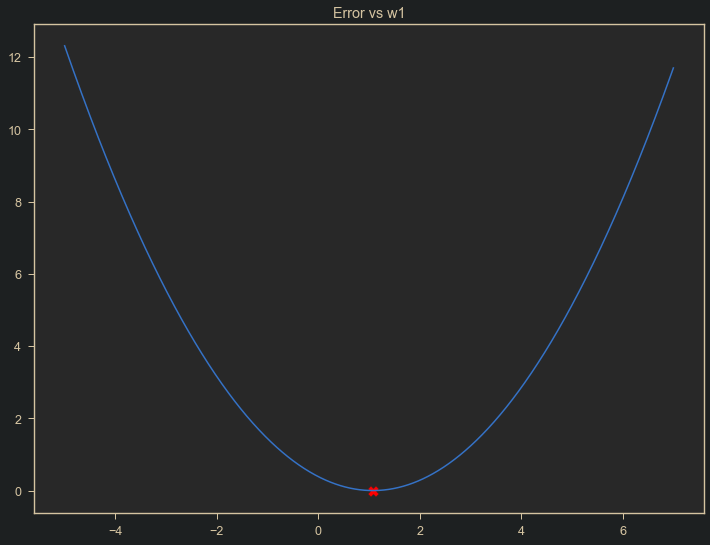

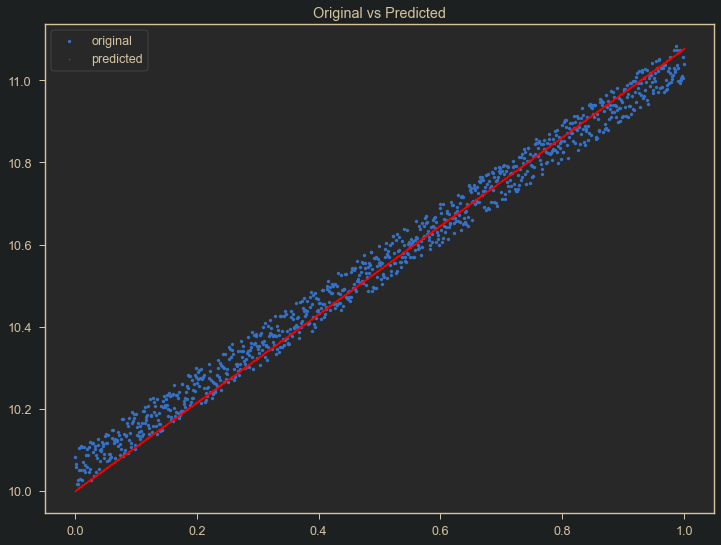

In [4]:
## Write your code here
# initialising w0
w0 = 10
w1_arr = np.reshape(np.linspace(-5,7,1000),(1000,-1)) # array of w1
# y matrix for different combinations of w1
y_pred = w0 + x @ w1_arr.T
# print(y_pred.shape)

# error for each value of w1
error = np.reshape(np.average((y_cor-y_pred)**2,axis=0),(1000,-1))
# print(error.shape)

# best predicted y value
y_bp = y_pred[:,np.argmin(error)]

# plotting error vs w1
plt.figure(figsize=(12,9))
plt.plot(w1_arr,error);
plt.scatter(w1_arr[np.argmin(error)],np.min(error),marker='X',color='red',s=100);
plt.title("Error vs w1");

# plotting best predicted line
plt.figure(figsize=(12,9))
plt.title("Original vs Predicted");
plt.scatter(x,y_cor,s=10);
plt.scatter(x,y_bp,c='red',s=2);
plt.legend(['original','predicted']);

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

Value of w_1 calculated from gradient descent is : 1.0766206822466167


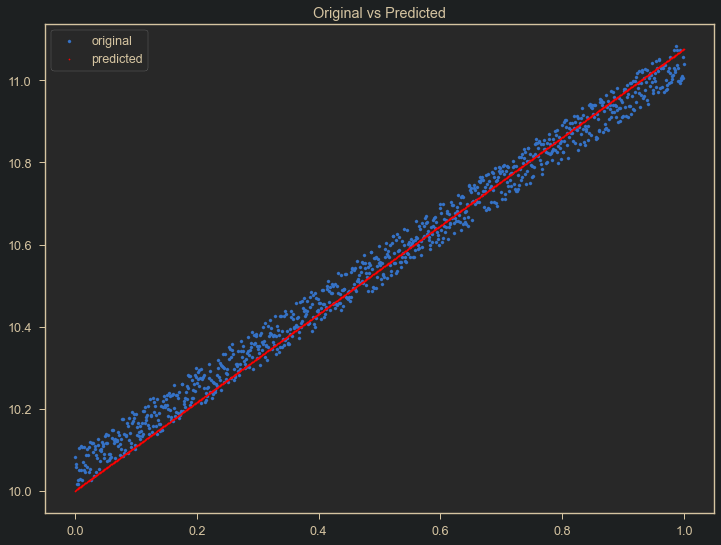

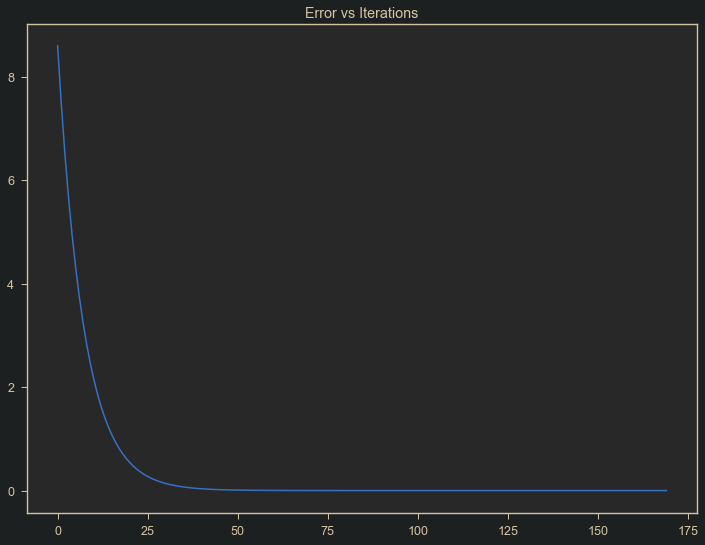

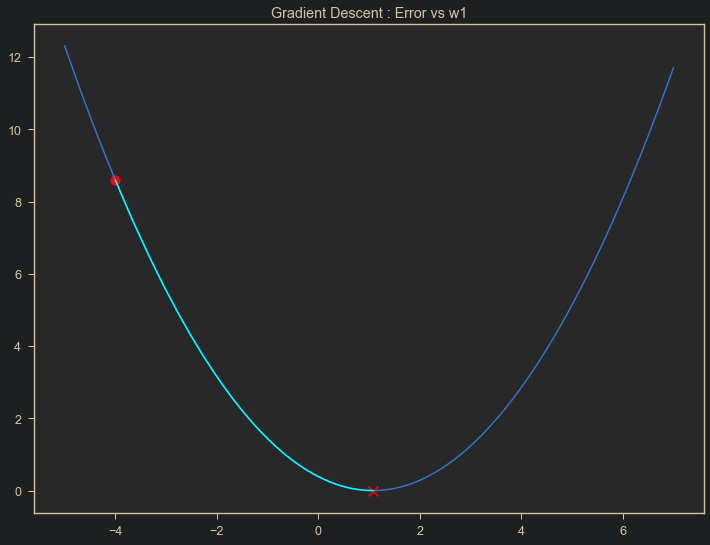

In [5]:
## Write your code here
# assuming w0 already known
# initialising some variables
w0 = 10
w1 = [-4]
error = []
de_w1 = [] # diff Error wrt w1 
lr = 0.1 # learning rate
eps = 1e-10 # epsilon for comparing successive errors
n_iter = 1000 # max no of iterations

# looping over iterations
for itr in range(n_iter):
    error = np.append(error,np.average((y_cor-w0-w1[-1]*x)**2)) # calculating error
    de_w1 = np.append(de_w1,-2*np.average((y_cor-w0-w1[-1]*x)*x)) # calculling del values
    w1 = np.append(w1,w1[-1]-lr*de_w1[-1]) # appending w1
    #checking diff in error values
    if itr>=2:
        if error[-2]-error[-1]<eps: # if successive errors less than eps, then exit
            break
# printing w1 optimal
print('Value of w_1 calculated from gradient descent is :', w1[-1])
# predicting optimal y values
y_pred = w0 + w1[-1]*x

# plotting original vs predicted
plt.figure(figsize=(12,9))
plt.title("Original vs Predicted")
plt.scatter(x,y_cor,s=10);
plt.scatter(x,y_pred,c='red',s=2);
plt.legend(['original','predicted']);

#plotting error vs iterations
plt.figure(figsize=(12,9))
plt.title("Error vs Iterations")
plt.plot(error);

#calc error for each different values of w1
w1_arr = np.reshape(np.linspace(-5,7,1000),(1000,-1))
y_pred = w0 + x @ w1_arr.T
error1 = np.reshape(np.average((y_cor-y_pred)**2,axis=0),(1000,-1))

# plotting history of error and w1
plt.figure(figsize=(12,9))
plt.plot(w1_arr,error1);
plt.plot(w1[0:-1],error,color='cyan');
plt.scatter(w1[-2],error[-1],marker='x',color='red',s=100);
plt.scatter(w1[0],error[0],marker='o',color='red',s=100);
plt.title("Gradient Descent : Error vs w1");

# Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

Text(0.5, 1.0, 'y_true vs x')

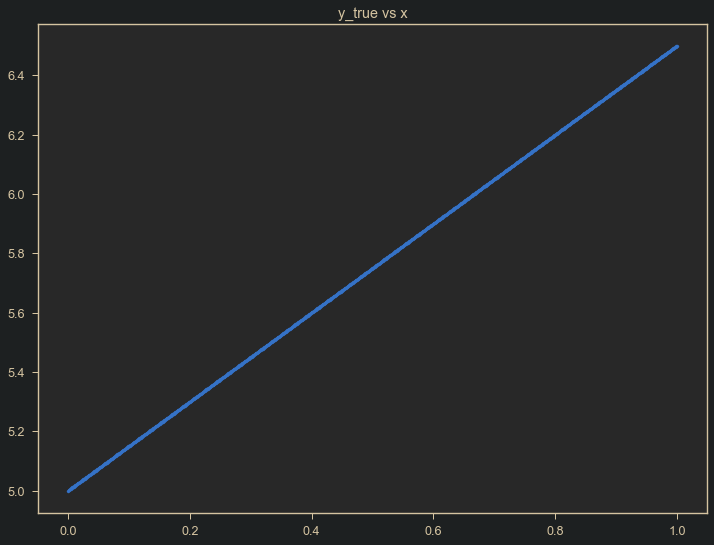

In [6]:
## Write your code here
# initialising variables
x = np.reshape(np.linspace(0,1,1000),(1000,1))
w0=5
w1=1.5
# true y
y = w0 + w1*x

#plot true y vs x
plt.figure(figsize=(12,9))
plt.scatter(x,y,s=10);
plt.title("y_true vs x")

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

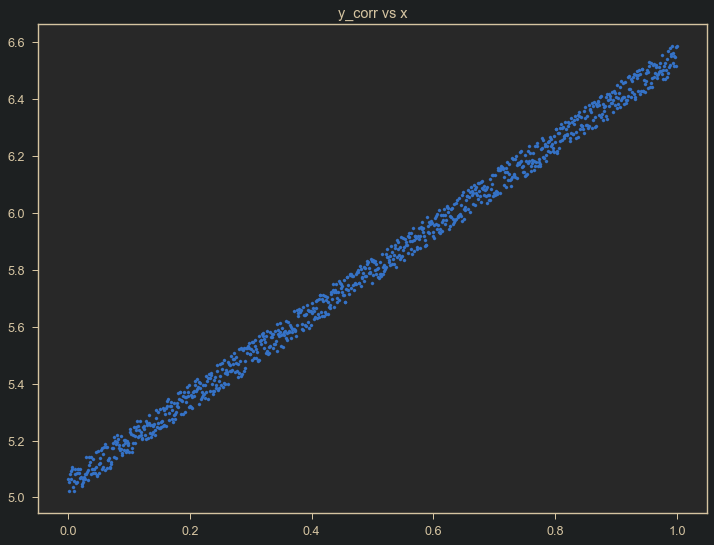

In [7]:
## Write your code here
# random noise
rand = np.reshape(np.random.uniform(0,1,len(y)),y.shape)
# corrupting y true
y_cor = y + 0.1*rand
# print(y_cor.shape)

#plot corr y vs x
plt.figure(figsize=(12,9))
plt.scatter(x,y_cor,s=10);
plt.title("y_corr vs x");

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

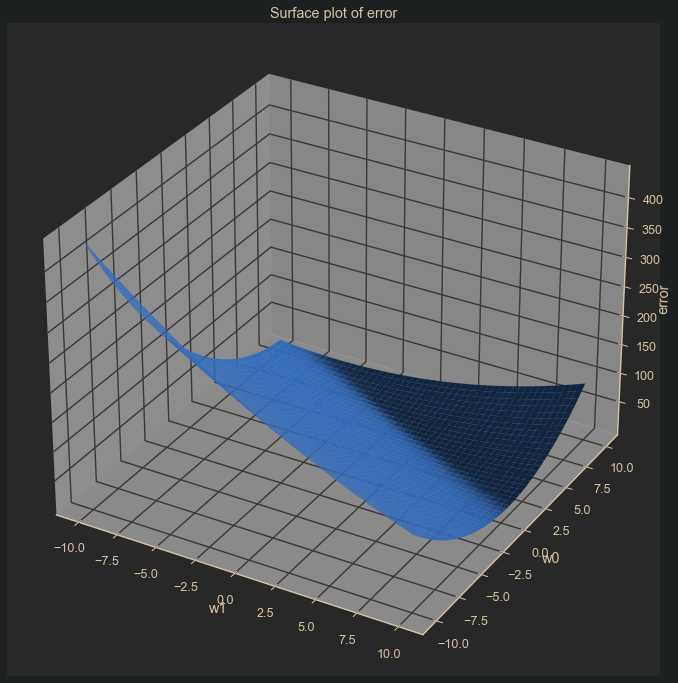

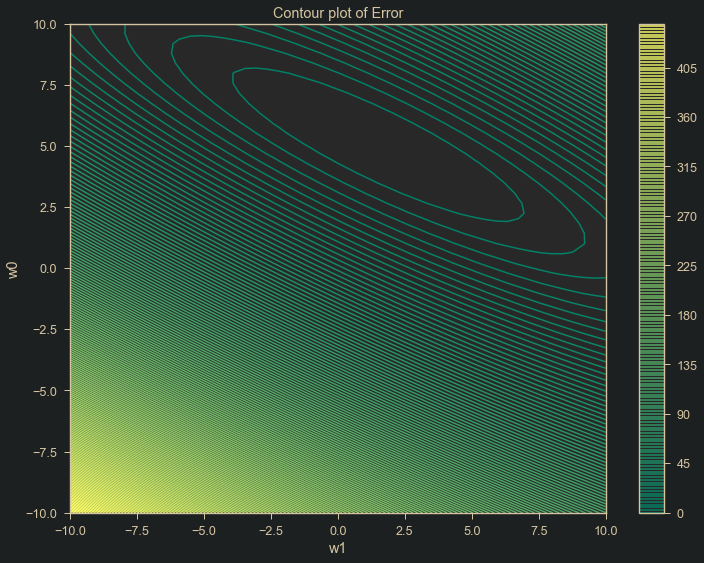

In [8]:
## Write your code here
# initialising w0 and w1 arrays
w0 = np.linspace(-10,10,50)
w1 = np.linspace(-10,10,50)
# meshgrid for surface and 3d plot
W0,W1 = np.meshgrid(w0,w1)
#declaring error
Error = np.empty((len(w0),len(w1)))
# looping over w0 and w1
for i in range(len(w0)):
    for j in range(len(w1)):
        Error[i,j] = np.average((y_cor-W0[i,j]-W1[i,j]*x)**2) # error for diff value of w0 and w1

#surface plot
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.plot_surface(W1,W0,Error);
ax.set_title('Surface plot of error');
ax.set_xlabel('w1');
ax.set_ylabel('w0');
ax.set_zlabel('error');

#contour plot of error
plt.figure(figsize=(12,9))
plt.contour(W1,W0,Error,200,cmap='summer');
plt.title("Contour plot of Error");
plt.colorbar();
plt.xlabel('w1');
plt.ylabel('w0');

**Gradient Descent to find optimal Values**

Value of w_0 calculated from gradient descent is : 5.051080407598729
Value of w_1 calculated from gradient descent is : 1.5013758390575416


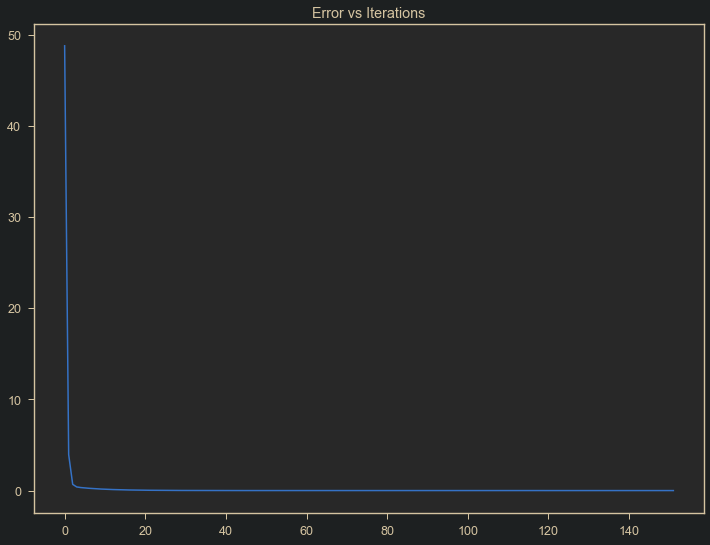

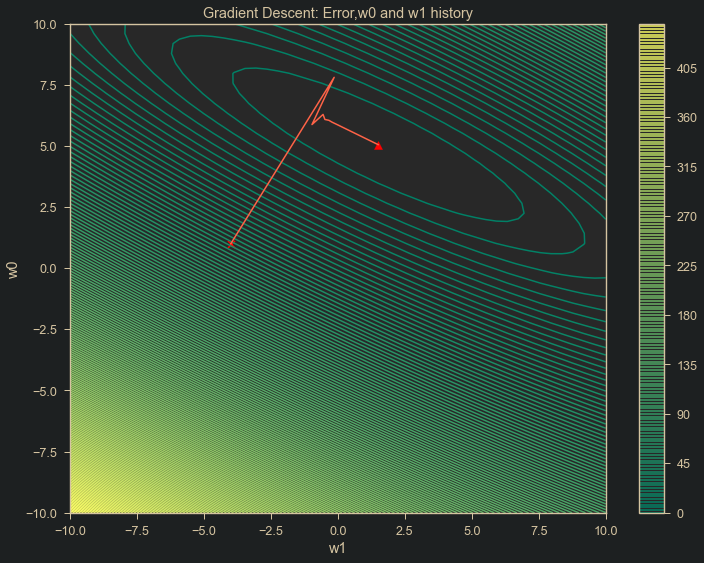

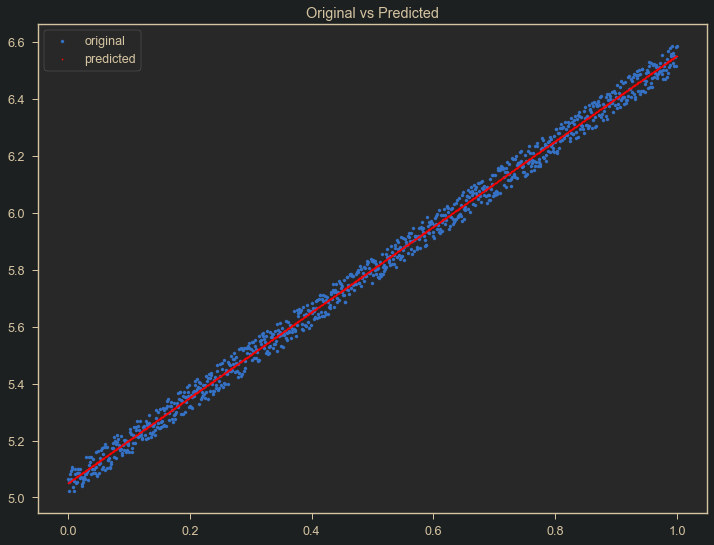

In [9]:
## Write your code here
# initialising variables
w0 = [1]
w1 = [-4]
error = []
de_w0 = [] # diff error wrt w0
de_w1 = [] # diff error wet w1
lr = 0.5 # learning rate
eps = 1e-10 # epsilon for comparing consecutive errors
n_iter = 1000 # max no of iterations
# looping over iterations
for itr in range(n_iter):
    error = np.append(error,np.average((y_cor-w0[-1]-w1[-1]*x)**2)) # append error
    de_w0 = np.append(de_w0,-2*np.average((y_cor-w0[-1]-w1[-1]*x))) # append diff error wrt w0
    de_w1 = np.append(de_w1,-2*np.average((y_cor-w0[-1]-w1[-1]*x)*x)) # append diff error wet w1
    w0 = np.append(w0,w0[-1]-lr*de_w0[-1]) # append w0
    w1 = np.append(w1,w1[-1]-lr*de_w1[-1]) # append w1
    # check consecutive values of error
    if itr>=2:
        if error[-2]-error[-1]<eps: # if diff of cons values of error less than eps, then exit loop
            break
# predicting y with optimal vlaues of w0 and w1
y_pred = w0[-1] + w1[-1]*x

# printing w0 and w1
print('Value of w_0 calculated from gradient descent is :', w0[-1])
print('Value of w_1 calculated from gradient descent is :', w1[-1])

# plot error vs iterations
plt.figure(figsize=(12,9))
plt.title("Error vs Iterations")
plt.plot(error);

# ploting error,w0 and w1 history 
plt.figure(figsize=(12,9))
plt.contour(W1,W0,Error,200,cmap='summer');
plt.colorbar();
plt.plot(w1,w0,color='tomato');
plt.xlabel('w1');
plt.ylabel('w0');
plt.scatter(w1[0],w0[0],color='red',marker='x',s=50);
plt.scatter(w1[-1],w0[-1],color='red',marker='^',s=70);
plt.title("Gradient Descent: Error,w0 and w1 history");

# plot predicted line
plt.figure(figsize=(12,9))
plt.title("Original vs Predicted")
plt.scatter(x,y_cor,s=10);
plt.scatter(x,y_pred,c='red',s=2);
plt.legend(['original','predicted']);

# Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

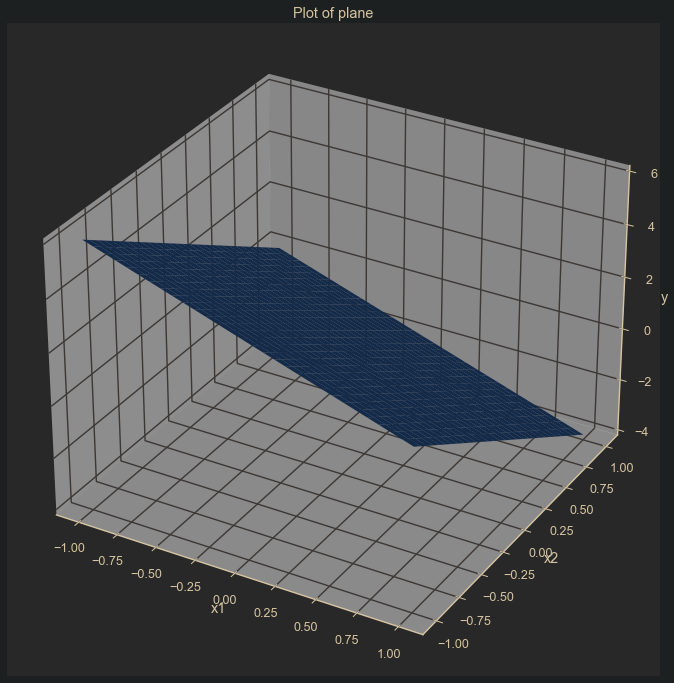

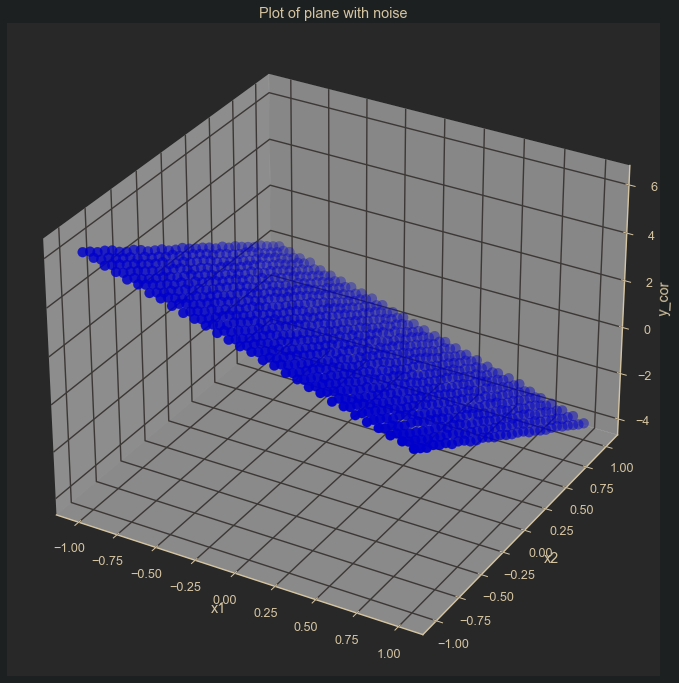

In [10]:
## Write your code here
# initialising variables
w0 = 1
w1 = -2
w2 = -3
x1 = np.reshape(np.linspace(-1,1,30),(30,1))
x2 = np.reshape(np.linspace(-1,1,30),(30,1))
X1,X2 = np.meshgrid(x1,x2) # meshgrid for contour and 3d plots
Y = w0 + w1*X1 + w2*X2 # true y

# plot surface
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.plot_surface(X1,X2,Y);
ax.set_title('Plot of plane');
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('y');

# random noise 
noise = np.random.uniform(0,1,size=Y.shape)
Y_cor = Y + 0.1*noise # corrupting true y

# plot corr plane
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.scatter3D(X1,X2,Y_cor,color='mediumblue',s=100);
ax.set_title('Plot of plane with noise');
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('y_cor');

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

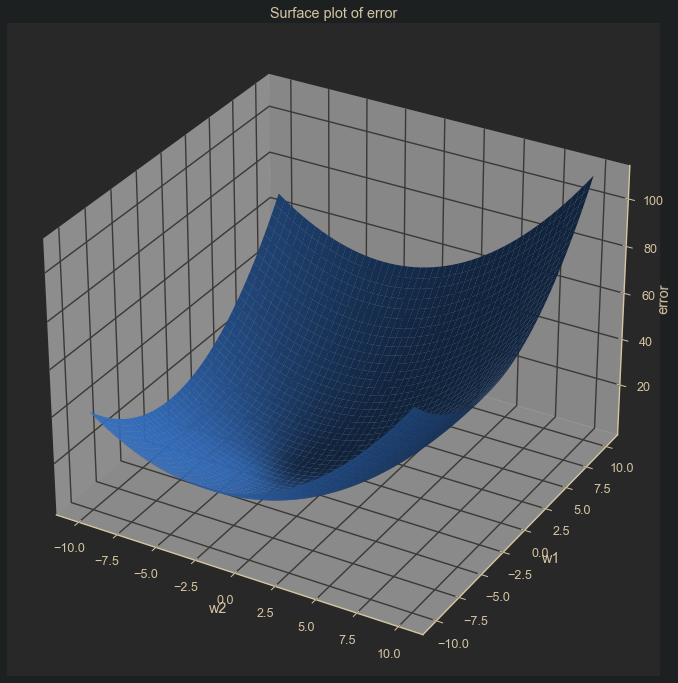

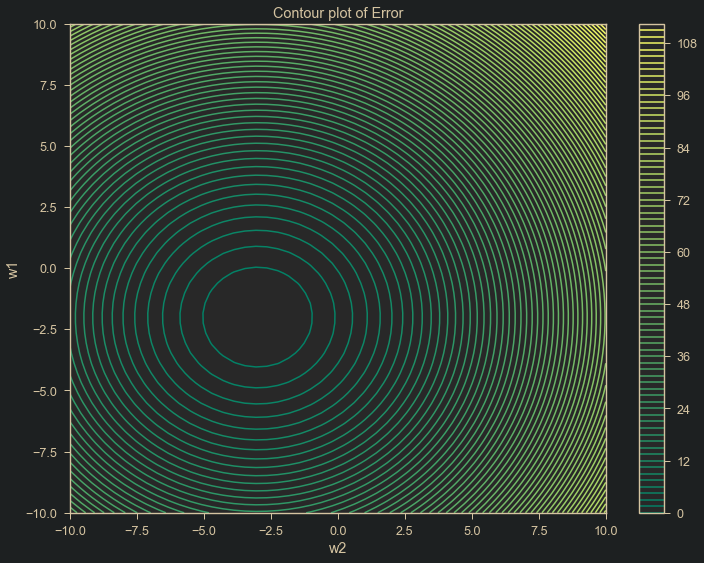

In [11]:
## Write your code here
#initialising w1 and w2 arrays
w1 = np.linspace(-10,10,50)
w2 = np.linspace(-10,10,50)
W1,W2 = np.meshgrid(w1,w2) # meshgrid
Error = np.empty((len(w1),len(w2))) # declaring error
# looping over w1 and w2
for i in range(len(w1)):
    for j in range(len(w2)):
        Error[i,j] = np.average((Y_cor-w0-W1[i,j]*X1-W2[i,j]*X2)**2) # calc error for different values of w1 and w2

#plot error surface
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.plot_surface(W2,W1,Error);
ax.set_title('Surface plot of error');
ax.set_xlabel('w2');
ax.set_ylabel('w1');
ax.set_zlabel('error');

#plot error contour
plt.figure(figsize=(12,9))
plt.contour(W2,W1,Error,80,cmap='summer');
plt.colorbar();
plt.xlabel('w2');
plt.ylabel('w1');
plt.title("Contour plot of Error");

**Prediction using Gradient Descent**

Value of w_1 calculated from gradient descent is : -1.9988527489864516
Value of w_2 calculated from gradient descent is : -3.001101544687402


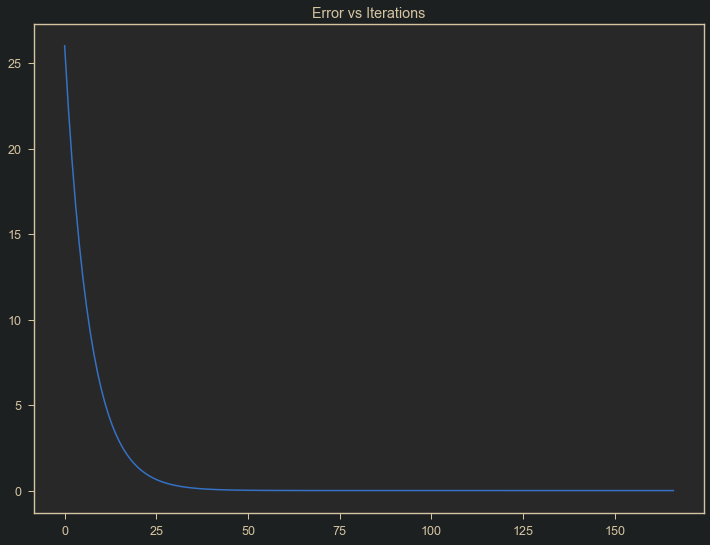

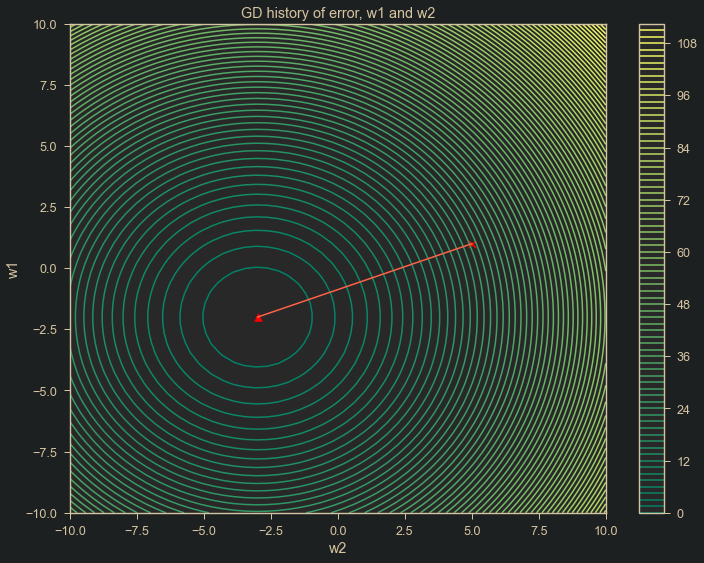

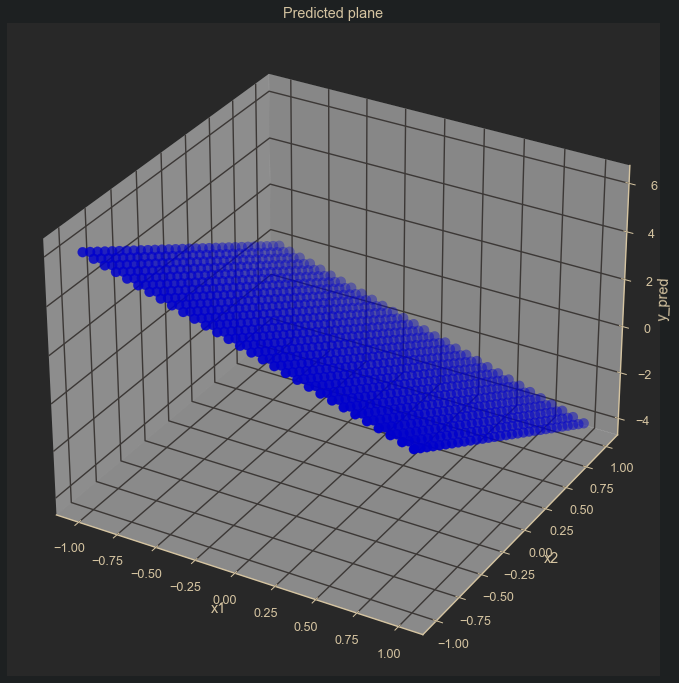

In [12]:
## Write your code here
# initialising variables
w1 = [1]
w2 = [5]
error = []
de_w1 = [] # diff error wrt w1
de_w2 = [] # diff error wrt w2
lr = 0.1 # learning rate
eps = 1e-10 # eps for exit condn
n_iter = 1000 # max iteration
# looping over iterations
for itr in range(n_iter):
    error = np.append(error,np.average((Y_cor-w0-w1[-1]*X1-w2[-1]*X2)**2)) # append error
    de_w1 = np.append(de_w1,-2*np.average((Y_cor-w0-w1[-1]*X1-w2[-1]*X2)*X1)) # append diff error wrt w1
    de_w2 = np.append(de_w2,-2*np.average((Y_cor-w0-w1[-1]*X1-w2[-1]*X2)*X2)) # append diff error wrt w2
    w1 = np.append(w1,w1[-1]-lr*de_w1[-1]) # update and append w1
    w2 = np.append(w2,w2[-1]-lr*de_w2[-1]) # update and append w2
    # check consecutive error values
    if itr>=2:
        if error[-2]-error[-1]<eps: # consecutive error diff les than eps, then exit loop
            break

# predict y with optimal w1 and w2
Y_pred = w0 + w1[-1]*X1 + w2[-1]*X2

# printing w1 and w2
print('Value of w_1 calculated from gradient descent is :', w1[-1])
print('Value of w_2 calculated from gradient descent is :', w2[-1])

# plot error vs iter
plt.figure(figsize=(12,9))
plt.title("Error vs Iterations")
plt.plot(error);

# plot hist of GD
plt.figure(figsize=(12,9))
plt.contour(W2,W1,Error,80,cmap='summer');
plt.colorbar();
plt.xlabel('w2');
plt.ylabel('w1');
plt.plot(w2,w1,color='tomato');
plt.scatter(w2[0],w1[0],color='red',marker='x',s=50);
plt.scatter(w2[-1],w1[-1],color='red',marker='^',s=70);
plt.title("GD history of error, w1 and w2");

# plot pred plane
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.scatter3D(X1,X2,Y_pred,color='mediumblue',s=100);
ax.set_title('Predicted plane');
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('y_pred');

# Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

Initial Data shape : (5, 1000)
Dimension of Weight matrix: (6, 1)
Data shape after augmenting: (6, 1000)
Shape of Output: (1000, 1)
Optimal weights obatained by computation:  [[1.05018157 1.99550875 1.99849878 5.00039301 8.99709601 3.00193169]]
Optimal weights obatained by Gradient descent:  [[1.05060349 2.00430969 2.00639565 4.99928458 9.00008132 3.01142523]]


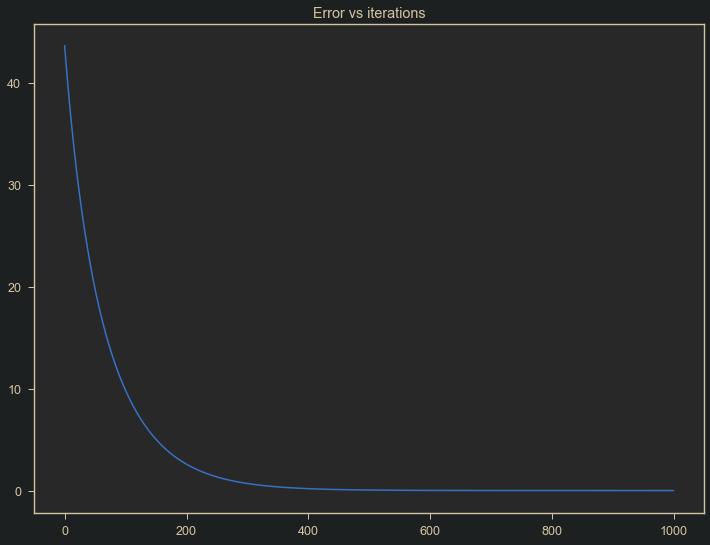

In [13]:
class regression:
    # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        #write code here
        w = w_old + 2*lr*x@(y-x.T@w_old)/len(y)
        return w

    def error(self,w,y,x):
        return np.average((y-x.T@w)**2)# write code here

    def mat_inv(self,y,x_aug):
        return np.linalg.pinv(x_aug@x_aug.T)@x_aug@y# write code here

    # By Gradien descent

    def Regression_grad_des(self,x,y,lr):
        w = np.reshape(np.random.uniform(0.1,10,x.shape[0]),(x.shape[0],1))
        err = []
        for i in range(10000):
        # write code here
            err.append(self.error(w,y,x))
            w = self.grad_update(w,lr,y,x)
            dev=np.abs(self.error(w,y,x)-err[-1])# write code here)
            # print(i)
            if dev <= 0.000001 :
                break
        w_pred = w;
        return w_pred,err


#############################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print("Initial Data shape :",x.shape)

w = np.reshape([1,2,2,5,9,3],(sim_dim+1,1))## Write your code here (Initialise the weight matrix) (W=[w0,w1,.....,wM]')
print('Dimension of Weight matrix:',w.shape)

## Augment the Input
x_aug = np.append(np.ones((1,sim_no_data)),x,axis=0)## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print('Data shape after augmenting:',x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print("Shape of Output:",y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print("Optimal weights obatained by computation: ",w_opt.T)

# By Gradient descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred.T)

plt.figure(figsize=(12,9))
plt.plot(err);
plt.title("Error vs iterations");

# Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

Data shape : (1000, 6)
Data shape after augmenting: (6, 900)
Optimal weights obatained by computation:  [[2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]]
Optimal weights obatained by Gradient descent:  [[5.15403678e+04 2.23805330e+03 5.50094709e+02 2.32588213e+01
  3.31340068e+02 1.28138327e+04]]


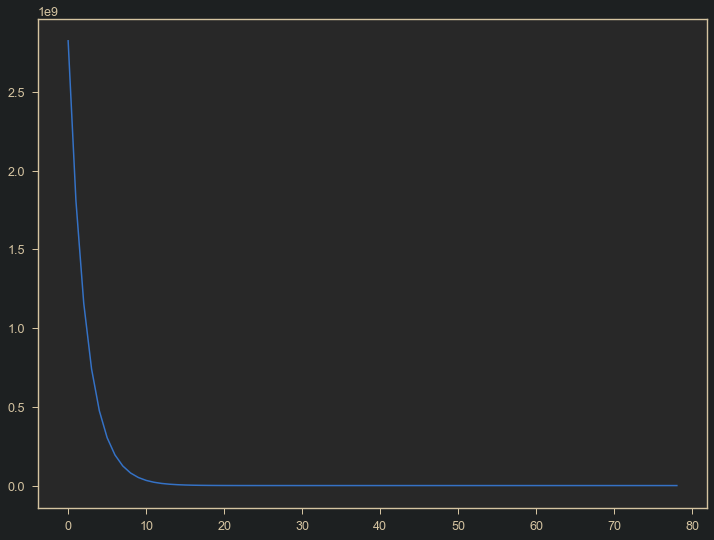

In [14]:
## Write your code here
import pandas as pd
df = pd.read_csv('salary_pred_data.csv')
# df
print("Data shape :",df.shape)

from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.1)

x_train = train.iloc[:,0:-1].to_numpy()
y_train = train.iloc[:,-1].to_numpy()[:,np.newaxis]
x_test = test.iloc[:,0:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()[:,np.newaxis]

# Augment the Input
x_aug = np.append(np.ones((1,x_train.shape[0])),x_train.T,axis=0)
print('Data shape after augmenting:',x_aug.shape)

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y_train,x_aug)
print("Optimal weights obatained by computation: ",w_opt.T)

# By Gradien descent
class regression:
    # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        #write code here
        w = w_old + 2*lr*np.dot(x,(y-np.dot(x.T,w_old)))/len(y)
        return w

    def error(self,w,y,x):
        return np.average((y-np.dot(x.T,w))**2)# write code here

    def mat_inv(self,y,x_aug):
        return np.linalg.pinv(x_aug@x_aug.T)@x_aug@y# write code here

    # By Gradien descent

    def Regression_grad_des(self,x,y,lr):
        w = np.reshape(np.random.uniform(0.1,10,x.shape[0]),(x.shape[0],1))
        err = []
        for i in range(10000):
        # write code here
            err.append(self.error(w,y,x));
            w = self.grad_update(w,lr,y,x);
            dev=np.abs(self.error(w,y,x)-err[-1]);# write code here)
            # print(i)
            if dev <= 0.000001 :
                break
        w_pred = w;
        return w_pred,err
    
reg = regression()
lr=0.1
x_std = x_aug;
for i in np.arange(1,x_aug.shape[0]):
    x_std[i,:] = (x_aug[i,:]-np.mean(x_aug[i,:]))/np.std(x_aug[i,:]);
w_pred,err=reg.Regression_grad_des(x_std,y_train,lr);
print("Optimal weights obatained by Gradient descent: ",w_pred.T);

plt.figure(figsize=(12,9))
plt.plot(err);

In [15]:
# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y_train,x_aug)
print("Optimal weights obatained by computation: ",w_opt.T)
# By scikit learn library
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
print("Optimal weights obatained by scikit: ",np.append([reg.intercept_],reg.coef_))
y_pred = reg.predict(x_test)
print("Error using sklearn library: ",np.average((y_pred-y_test)**2))

Optimal weights obatained by computation:  [[5.15403689e+04 2.23805361e+03 5.50094537e+02 2.32586576e+01
  3.31340040e+02 1.28138332e+04]]
Optimal weights obatained by scikit:  [2.e+04 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]
Error using sklearn library:  8.827671497165911e-23
